In [1]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
# from sklearn.linear_model import LinearRegression       # 선형 회귀
# from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

타이타닉 생존자 분류 모델을 구현하시오
target : survived

분류 : knn, 로지스틱, rforest

In [ ]:
# 데이터 확인 : nan, 0, 타입
# - pclass : Passenger Class, 승객 등급
# - survived : 생존 여부 : target 값이 됨.
# - name : 승객 이름
# - sex : 승객 성별
# - age : 승객 나이
# - sibsp : 탑승 한 형제/배우자 수
# - parch : 탑승 한 부모/자녀 수
# - ticket : 티켓 번호
# - fare : 승객 지불 요금
# - cabin : 선실 이름
# - embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
# - body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
# - home.dest : 고향/목적지

In [9]:
df = pd.read_csv('titanic_train.csv')
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0,NaN,S,NaN,"Cornwall / Akron, OH"


In [16]:
df.groupby('cabin').count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest
cabin,,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,0,1
A11,1,1,1,1,1,1,1,1,1,1,0,1
A14,1,1,1,1,0,1,1,1,1,1,0,1
A16,1,1,1,1,1,1,1,1,1,1,0,1
A18,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
F2,3,3,3,3,3,3,3,3,3,3,1,3
F33,3,3,3,3,3,3,3,3,3,3,0,3
F4,3,3,3,3,3,3,3,3,3,3,0,3


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000,85.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050,157.870588
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524,98.257653
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,68.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,249.000000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,328.000000


In [32]:
df.head(2)
df['sex'].replace('female','1',inplace=True)
df['sex'].replace('male','0',inplace=True)
df['age'].fillna(0,inplace=True)
df

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_16156\306463815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace('female','1',inplace=True)
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_16156\306463815.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",1,13.00,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",1,4.00,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",1,30.00,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",0,0.00,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",1,22.00,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",1,0.17,1,2,C.A. 2315,20.5750,NaN,S,NaN,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",0,0.00,0,0,376563,8.0500,NaN,S,NaN,NaN
913,3,1,"Smyth, Miss. Julia",1,0.00,0,0,335432,7.7333,NaN,Q,NaN,NaN
914,2,1,"Sincock, Miss. Maude",1,20.00,0,0,C.A. 33112,36.7500,NaN,S,NaN,"Cornwall / Hancock, MI"


In [34]:
df2 = pd.read_csv('titanic_test.csv')
df2
df2['sex'].replace('female','1',inplace=True)
df2['sex'].replace('male','0',inplace=True)
df2['age'].fillna(0,inplace=True)
df2

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_16156\2347040083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['sex'].replace('female','1',inplace=True)
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_16156\2347040083.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",0,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",1,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",0,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",0,0.0,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",0,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,"Karlsson, Mr. Julius Konrad Eugen",0,33.0,0,0,347465,7.8542,NaN,S,NaN,NaN
389,2,1,"Ware, Mrs. John James (Florence Louise Long)",1,31.0,0,0,CA 31352,21.0000,NaN,S,NaN,"Bristol, England / New Britain, CT"
390,3,1,"O'Keefe, Mr. Patrick",0,0.0,0,0,368402,7.7500,NaN,Q,NaN,NaN
391,3,0,"Tobin, Mr. Roger",0,0.0,0,0,383121,7.7500,F38,Q,NaN,NaN


In [35]:
train_into = df[['pclass','sex','age','sibsp','parch','fare']]
train_target = df['survived']
test_into = df2[['pclass','sex','age','sibsp','parch','fare']]
test_target = df2['survived']

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_into)
train_scaled = ss.transform(train_into)
test_scaled = ss.transform(test_into)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
kf = KNeighborsClassifier()
kf.fit(train_scaled,train_target)
print(kf.score(train_scaled,train_target))
print(kf.score(test_scaled,test_target))

0.8395196506550219
0.7709923664122137


In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

xgb = XGBClassifier(tree_method='hist',random_state=42)
scores = cross_validate(xgb,train_scaled,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.966976047234585
0.7925754335946781


In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7958515283842795
0.7888040712468194


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7969432314410481
0.7888040712468194


In [50]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss='log_loss',max_iter=10,random_state=1)
sg.fit(train_scaled,train_target)
print(sg.score(train_scaled,train_target))
print(sg.score(test_scaled,test_target))

0.759825327510917
0.7837150127226463


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [70]:
classes = np.unique(train_target)
sg.partial_fit(train_scaled,train_target,classes=classes)
print(sg.score(train_scaled,train_target))
print(sg.score(test_scaled,test_target))

0.7587336244541485
0.7608142493638677


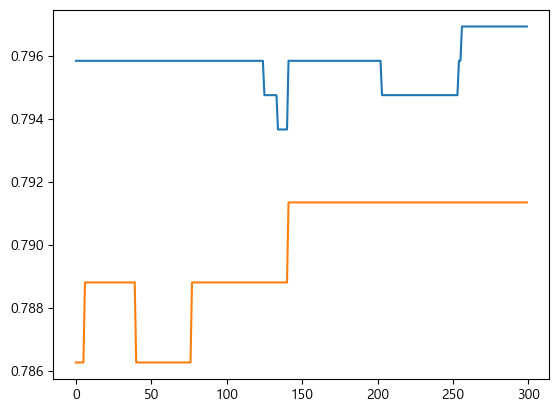

In [72]:
train = []
test = []
for i in range(300):
    sg.partial_fit(train_scaled,train_target,classes=classes)
    train.append(sg.score(train_scaled,train_target))
    test.append(sg.score(test_scaled,test_target))

plt.plot(train)
plt.plot(test)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train_scaled,train_target)
print(rf.score(train_scaled,train_target))
print(rf.score(test_scaled,test_target))

0.9748908296943232
0.7989821882951654


In [77]:
scores = cross_validate(xgb,train_scaled,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.966976047234585
0.7925754335946781


In [78]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=50,random_state=42)
tree.fit(train_scaled,train_target)
print(tree.score(train_scaled,train_target))
print(tree.score(test_scaled,test_target))

0.9748908296943232
0.7531806615776081


In [85]:
tree2 = DecisionTreeClassifier(max_depth=3,min_impurity_decrease=0.001)
tree2.fit(train_scaled,train_target)
print(tree2.score(train_scaled,train_target))
print(tree2.score(test_scaled,test_target))

0.8034934497816594
0.7938931297709924


[Text(0.5, 0.875, 'x[1] <= 0.279\ngini = 0.474\nsamples = 916\nvalue = [563, 353]'),
 Text(0.25, 0.625, 'x[0] <= -0.941\ngini = 0.305\nsamples = 581\nvalue = [472, 109]'),
 Text(0.125, 0.375, 'x[5] <= 2.164\ngini = 0.439\nsamples = 123\nvalue = [83, 40]'),
 Text(0.0625, 0.125, 'gini = 0.459\nsamples = 112\nvalue = [72, 40]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.375, 0.375, 'x[4] <= 0.154\ngini = 0.256\nsamples = 458\nvalue = [389, 69]'),
 Text(0.3125, 0.125, 'gini = 0.222\nsamples = 386\nvalue = [337, 49]'),
 Text(0.4375, 0.125, 'gini = 0.401\nsamples = 72\nvalue = [52, 20]'),
 Text(0.75, 0.625, 'x[0] <= 0.246\ngini = 0.396\nsamples = 335\nvalue = [91.0, 244.0]'),
 Text(0.625, 0.375, 'x[5] <= -0.018\ngini = 0.142\nsamples = 182\nvalue = [14, 168]'),
 Text(0.5625, 0.125, 'gini = 0.237\nsamples = 80\nvalue = [11, 69]'),
 Text(0.6875, 0.125, 'gini = 0.057\nsamples = 102\nvalue = [3, 99]'),
 Text(0.875, 0.375, 'x[5] <= -0.194\ngini = 0.5\nsamples = 15

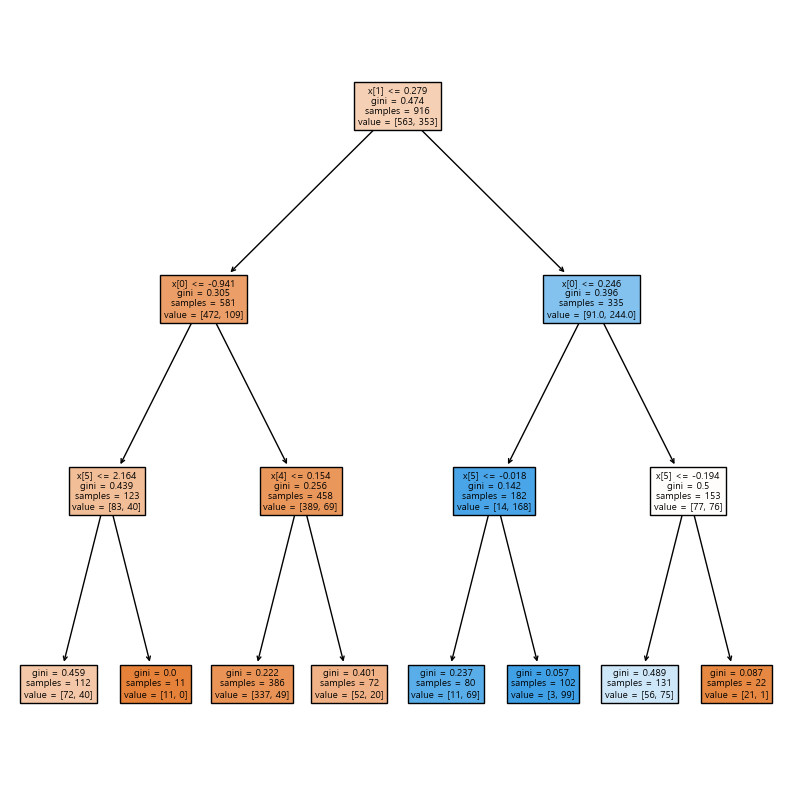

In [87]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree2,filled=True)